# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
import sys

from diff_equation_dimensional import *
sys.path.insert(1, '..')
from network import Net

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data

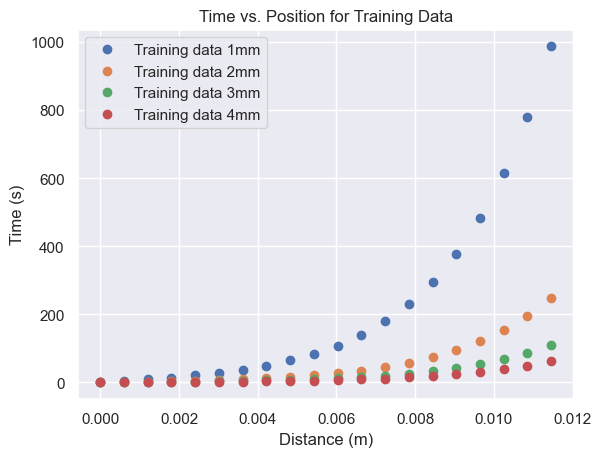

In [2]:
# Grab training data
dim_data = grab_training_data()

# Define legends for dimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(dim_data)):
        plt.plot(dim_data[i]['DISTANCE'], dim_data[i]['TIME'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Time (s)')
    plt.xlabel('Distance (m)')
    plt.title('Time vs. Position for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

# Run the Model

Losses for 4mm droplet:


c:\Users\rahav\Documents\GitHub\pinns-model\.venv\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/50000	data loss:	500.338	physics loss:	409.3404
Epoch 2/50000	data loss:	499.4635	physics loss:	409.3404
Epoch 3/50000	data loss:	498.7364	physics loss:	409.3404
Epoch 4/50000	data loss:	498.0127	physics loss:	409.3404
Epoch 5/50000	data loss:	497.2294	physics loss:	409.3404
Epoch 6/50000	data loss:	496.4268	physics loss:	409.3404
Epoch 7/50000	data loss:	495.5923	physics loss:	409.3404
Epoch 8/50000	data loss:	494.6851	physics loss:	409.3404
Epoch 9/50000	data loss:	493.6618	physics loss:	409.3404
Epoch 10/50000	data loss:	492.5092	physics loss:	409.3404
Epoch 11/50000	data loss:	491.2165	physics loss:	409.3404
Epoch 12/50000	data loss:	489.7868	physics loss:	409.3404
Epoch 13/50000	data loss:	488.1519	physics loss:	409.3404
Epoch 14/50000	data loss:	486.2949	physics loss:	409.3404
Epoch 15/50000	data loss:	484.1929	physics loss:	409.3404
Epoch 16/50000	data loss:	481.8264	physics loss:	409.3404
Epoch 17/50000	data loss:	479.1685	physics loss:	409.3404
Epoch 18/50000	data loss

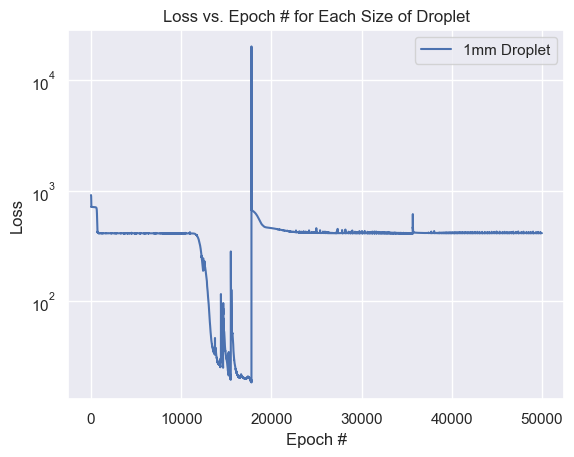

In [3]:
plt.yscale('log')
different_droplet_networks = [None] * len(dim_data)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
for i in range(3, 4):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_dim, epochs=50000, loss1_weight=1, loss2_weight=1e-11, lr=1e-3).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(dim_data[i]['DISTANCE']), np.array(dim_data[i]['TIME']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

# Results

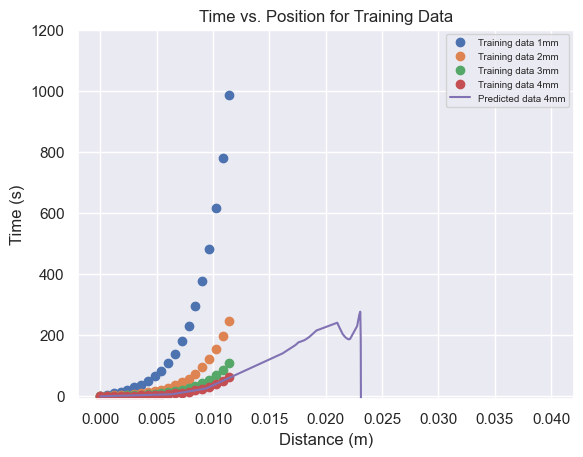

In [4]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
xs = np.linspace(0, 0.04, 1000)

# Plot dimensionalized model
for i in range(3, 4):
    preds = different_droplet_networks[i].predict(xs)
    plt.plot(xs, preds)
    dim_legend.append(f'Predicted data {i+1}mm')
plt.legend(dim_legend, fontsize=7)
plt.ylim(-10, 1200)
plt.show()